Model Evaluation:
R² Score: -0.54
Mean Absolute Error: ₹123250.00
Mean Squared Error: ₹20352985000.00


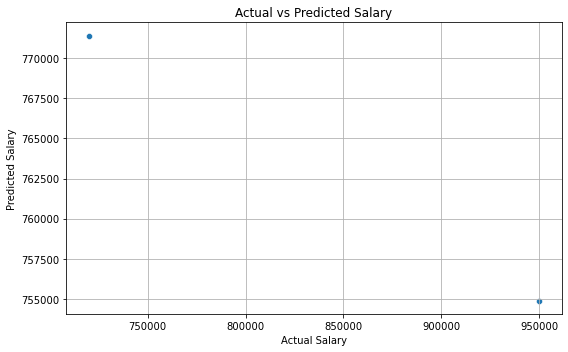

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


df = pd.read_excel("employee_salary_data.xlsx")


X = df.drop("Salary", axis=1)
y = df["Salary"]


categorical_cols = ['Job Title', 'Education', 'Industry', 'Location']


preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Model Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: ₹{mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: ₹{mean_squared_error(y_test, y_pred):.2f}")


plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()
